In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [2]:
datasets = {"agnews": 1 , "mnli": 0, "yahoo": 5, "yelp-full": 0} # "agnews": 1 , "mnli": 0, "yahoo": 5, "yelp-full": 0
all_client_num_in_total_list = {"agnews": 100, "yahoo": 1000, "yelp-full": 1000, "mnli": 1000}
alphas = {"agnews": 1, "yahoo": 0, "yelp-full": 0, "mnli": 0}
gammas = {"agnews": 0.001, "yahoo": 100, "yelp-full": 100, "mnli": 100}
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}

filenames = [
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.01.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.05.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_1.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_-1.log",
]
'''
"sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.01.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.05.log",
    "sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_1.log",
    "stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_-1.log",
'''

labels = ["filter_0.1", "filter_0.2", "filter_0.5", "filter_0.01", "filter_0.05", "filter_1", "no_filter"]

seed = 6

#

In [3]:
colors=['r','g','b','y','m','k', 'c','r','g','b','y', 'm','k']# 'm','k'
linestyle=['-','-','-','-','-','-','-','--','--','--','--','--','--']
linewidths = [0,0,0,0,0,0,0,1.5,1.5,1.5,1.5,1.5,1.5]

/home/cdq/FedPet/log/z-obsoleted/models&sort-11.25/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log
max accuracy is 0.8188157894736842, round is 3
['filter_0.1', 'filter_0.2', 'filter_0.5', 'filter_0.01', 'filter_0.05', 'filter_1', 'no_filter'] 0
/home/cdq/FedPet/log/z-obsoleted/models&sort-11.25/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log
max accuracy is 0.8526315789473684, round is 4
['filter_0.1', 'filter_0.2', 'filter_0.5', 'filter_0.01', 'filter_0.05', 'filter_1', 'no_filter'] 1
/home/cdq/FedPet/log/z-obsoleted/models&sort-11.25/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/sort_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log
max accuracy is 0.8363157894736842, round is 5
['filter_0.1', 'filter_0.2', 'filter_0.5', 'filter_0.01', 'filter_0.05', 'filter_1', 'no_

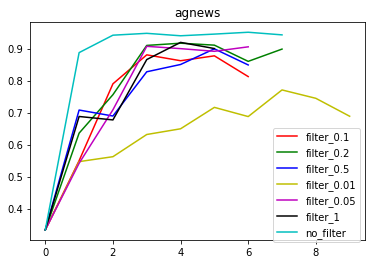

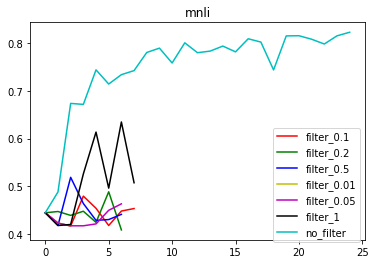

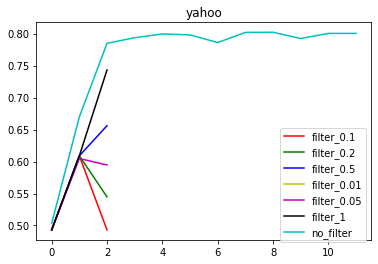

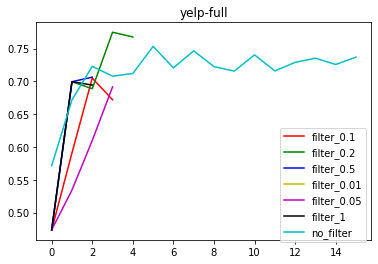

In [4]:
# round to accuracy
i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:
    root_path = f"/home/cdq/FedPet/log/z-obsoleted/models&sort-11.25/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"


    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase = 'aggregated model performance is'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")
            continue

        # print(filename)
        # print(df)
        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(labels, filenames.index(filename))
        plt.plot(range(iter),np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linestyle=linestyle[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    fig.savefig(f"../fig/a{i}.pdf")
    i = i+1

agnews:filter_0.1 normal ipet: 0.8983603577663501, vote k: 0.9010279650063742
agnews:filter_0.2 normal ipet: 0.9067807762892475, vote k: 0.909291336351917
agnews:filter_0.5 normal ipet: 0.9130041901591947, vote k: 0.9149119475615376
agnews:filter_0.01 normal ipet: 0.8988160006984166, vote k: 0.8611605455816694
agnews:filter_0.05 normal ipet: 0.8966699819493862, vote k: 0.9093459158426238
agnews:filter_1 normal ipet: 0.9150448397332911, vote k: 0.9150314717813767
mnli:filter_0.1 normal ipet: 0.7420202277159482, vote k: 0.7457432522796668
mnli:filter_0.2 normal ipet: 0.6858990423692045, vote k: 0.6885280676158794
mnli:filter_0.5 normal ipet: 0.6943051423925227, vote k: 0.6944262939774419
mnli:filter_0.05 normal ipet: 0.887411199811504, vote k: 0.87468074001764
mnli:filter_1 normal ipet: 0.7331490549622548, vote k: 0.7332269577512868
yahoo:filter_0.1 normal ipet: 0.6246174909486657, vote k: 0.6113363027288798
yahoo:filter_0.2 normal ipet: 0.6193096157816195, vote k: 0.6061861517067466
yah

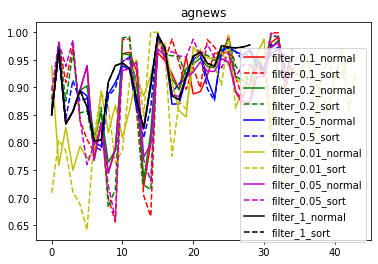

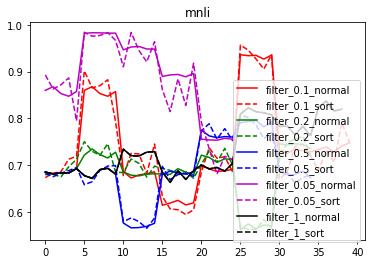

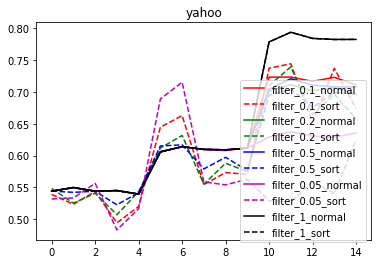

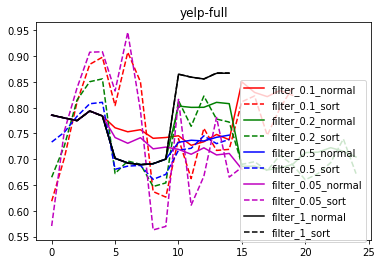

In [6]:
# round to accuracy
i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:

    root_path = f"/home/cdq/FedPet/log/z-obsoleted/models&sort-11.25/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"


    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase1 = r'Normal ipet selection results. Client'
        phrase2 = r'Vote k selection results. Client'
        with open(log_path) as f:
            f = f.readlines()
        df1 = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        df2 = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        gen = 0
        for line in f:
            if phrase1 in line:
                gen = gen + 1
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df1[0][gen]=acc
            if phrase2 in line:
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df2[0][gen]=acc
        
        df1 = df1.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        df2 = df2.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        
        iter = min(len(df2.index),len(df1.index))
        if df1.empty:
            # print(f"Bug: {log_path}")
            continue

        y1_mean = []
        for j in range(iter):
            y1 = np.array(df1.iloc[j])
            y1_mean.append(pd.DataFrame(y1).dropna().mean())


        if df2.empty:
            print(f"Bug: {log_path}")
            continue
        
        y2_mean = []
        for j in range(iter):
            y2 = np.array(df2.iloc[j])
            y2_mean.append(pd.DataFrame(y2).dropna().mean())
        
        print(f'{dataset}:{labels[filenames.index(filename)]} normal ipet: {np.mean(y1_mean)}, vote k: {np.mean(y2_mean)}')
        plt.plot(range(iter),np.array(y1_mean),label=f'{labels[filenames.index(filename)]}_normal',color=colors[filenames.index(filename)],linestyle='-')
        plt.plot(range(iter),np.array(y2_mean),label=f'{labels[filenames.index(filename)]}_sort',color=colors[filenames.index(filename)],linestyle='--')
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    fig.savefig(f"../fig/a{i}.pdf")
    i = i+1

In [20]:
df1

,0


/home/cdq/FedPet/log/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log not exists
/home/cdq/FedPet/log/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.01.log not exists
/home/cdq/FedPet/log/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log not exists
/home/cdq/FedPet/log/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log not exists
/home/cdq/FedPet/log/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.05.log not exists
/home/cdq/FedPet/log/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_1.log not exist

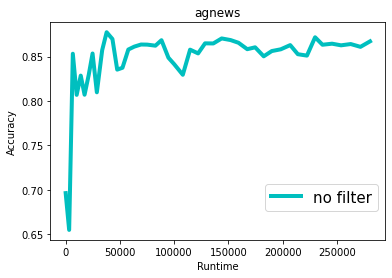

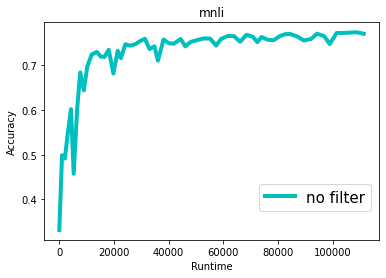

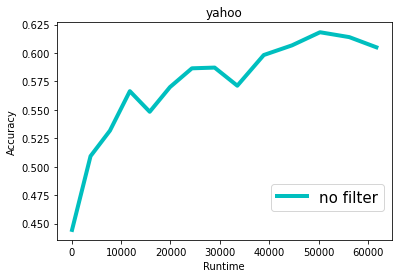

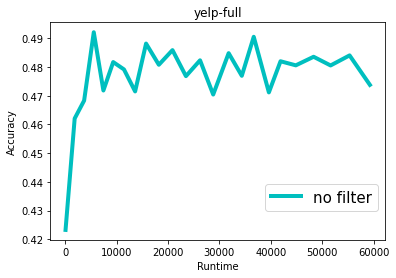

In [5]:
# time to accuracy  
t = 0   
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
runtime_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}     
for dataset in datasets:

    root_path = f"/home/cdq/FedPet/log/z-obsoleted/filter-11.19/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"
    
    fig = plt.figure()
    plt.title(dataset)
    plt.xlabel("Runtime")
    plt.ylabel("Accuracy")
    for filename in filenames:

        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue

        iter = 1000
        phrase = 'train data'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        runtime = []
        train_runtime = []
        infer_runtime = []
        time_stamp = 0
        train_time_stamp = 0
        infer_time_stamp = 0

        for line in f:
            if phrase in line:
                line_idx = f.index(line)
                
                train_info = f[line_idx]
                infer_info = f[line_idx + 1]
                
                # TX2: train, 1s/sample, infer, 0.5s/sample, no comm. because bit fit is parameter efficient.
                train_time = sum(list(map(int, re.findall(r'\d+', train_info.split("Gen")[1])))[1:]) * 1 
                infer_time = sum(list(map(int, re.findall(r'\d+', infer_info.split("Gen")[1])))[1:]) * 0.5
                
                time_stamp = time_stamp + train_time + infer_time # elasped time of all clients / energy consumption
                train_time_stamp = train_time + train_time_stamp
                infer_time_stamp = infer_time + infer_time_stamp

                runtime.append(time_stamp)
                train_runtime.append(train_time_stamp)
                infer_runtime.append(infer_time_stamp)
            if 'aggregated model performance is' in line: 
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")

        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, runtime is {runtime[idx]}")
        acc_list[dataset].append(this_max_acc)
        runtime_list[dataset].append(runtime[idx])
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(len(runtime),len(list(map(float, y_mean))))
        plt.plot(runtime[:len(y_mean)],np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linewidth=4,linestyle=linestyle[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.2),bbox_transform=fig.transFigure,ncol=2,fontsize=15)
    fig.savefig(f"../fig/b{t}.pdf")
    t = t+1

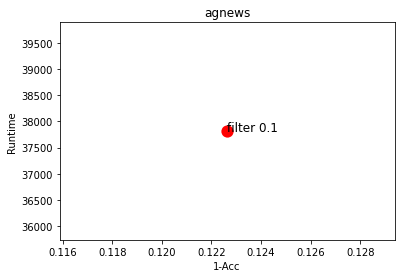

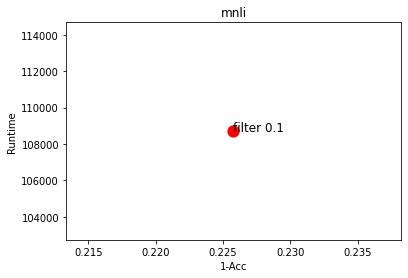

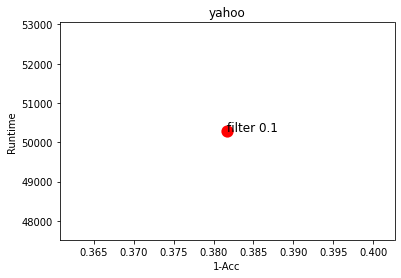

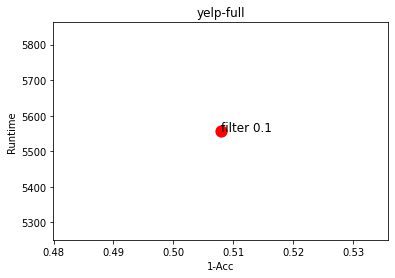

In [6]:
c=0
for dataset in datasets:
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")
    plt.scatter(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]),s=150,color=colors[:len(acc_list[dataset])],edgecolors='k',linewidths=linewidths[:len(acc_list[dataset])])
    for idx in range(len(acc_list[dataset])):
        plt.text(1-acc_list[dataset][idx], runtime_list[dataset][idx], labels[idx], fontsize=12)
    # plt.text(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]))
    plt.savefig(f"../fig/c{c}.pdf")
    c=c+1

In [17]:
acc_list

{'agnews': [0.8905263157894737,
  0.8855263157894737,
  0.8830263157894737,
  0.8873684210526316,
  0.8809210526315789,
  0.8843421052631579,
  0.8572368421052632,
  0.8747368421052631,
  0.8851315789473684,
  0.8759210526315789,
  0.8830263157894737,
  0.8725,
  0.8789473684210526],
 'mnli': [0.6820173204279164,
  0.6982170147733061,
  0.7471217524197656,
  0.7343861436576669,
  0.590728476821192,
  0.5721854304635762,
  0.7797249108507387,
  0.7282730514518594,
  0.5230769230769231,
  0.7145185939887927,
  0.43107488537952116,
  0.7316352521650535,
  0.6220071319409067],
 'yahoo': [0.66135,
  0.6488833333333334,
  0.6703,
  0.65765,
  0.6605333333333333,
  0.6584,
  0.6616833333333333,
  0.6488666666666667,
  0.6724,
  0.6515,
  0.6593333333333333,
  0.66835,
  0.6529333333333334],
 'yelp-full': [0.59498,
  0.57634,
  0.61142,
  0.6207,
  0.5939,
  0.60478,
  0.51584,
  0.60974,
  0.58922,
  0.60372,
  0.60274,
  0.5986,
  0.51436]}